In [1]:
%load_ext autoreload
%autoreload 2

import cv2

from tests.combinedspeed import generate_plots, run_test
from tests.detectordescriptor import DetectorDescriptor

from utils import get_cpu_name, get_files_from_array

In [2]:
display("CPU is {}".format(get_cpu_name()))
display("OpenCV version is {}".format(cv2.__version__))

'CPU is Intel(R) Core(TM) i7-7700HQ CPU @ 2.80GHz'

'OpenCV version is 3.4.0'

In [3]:
algos_s = ['AKAZE', 'BRISK', 'KAZE', 'ORB', 'SIFT', 'SURF']
algos = [DetectorDescriptor(s) for s in algos_s]

dirs = ['bark', 'bikes', 'boat', 'graf', 'leuven', 'trees', 'ubc', 'wall']
files = get_files_from_array(dirs)
images = [cv2.imread(image) for image in files]

cv2.ocl.setUseOpenCL(False)
data = run_test(images, algos)

Running test AKAZE
Running test BRISK
Running test KAZE
Running test ORB
Running test SIFT
Running test SURF


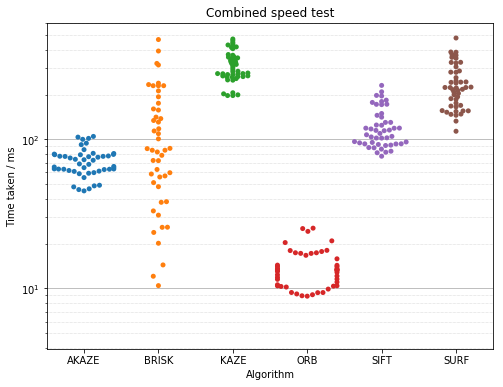

In [4]:
generate_plots(data);